# Aula 3 - Numpy e Pandas

Nessa aula, iremos tratar dos seguintes conteúdos:
- Numpy Matrizes
- Métodos de Matrizes Numpy
- Pandas
- Series
- Métodos Pandas
- DataFrames
- Trabalhando com CSVs

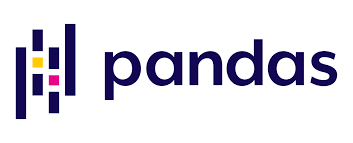

## Pandas

__Pandas__ é um pacote python construído com base no __NumPy__ e __Matplotlib__ que busca organizar dados no formato de tabela, atribuindo rótulos às linhas e colunas. O pacote __Pandas__ fornece ainda um conjunto de funcionalidades que permite processar as informações de tabelas de forma bastante eficiente, implementando métodos fundamentais para fins de tratamento de dados.

O Pandas organiza os dados nos seguintes tipos de estruturas:
- Series (Séries)
- DataFrame

 O __Pandas__ é um pacote e para utilizarmos, devemos importá-lo para o nosso notebook da seguinte forma:

In [3]:
import pandas as pd 
import numpy as np 

##   

### Series
A estrutura de representação tipo __Series__ do __Pandas__ é semelhante a um array unidimensional, porém os elementos podem ser indexados por números inteiros (como em um array do NumPy) ou por meio de rótulos (labels) que não precisam ser únicos e podem ser organizados de forma hierárquica.
- Quando os índices ou rótulos não são informados explicitamente, Pandas cria uma indexação com números inteiros automaticamente, variando os índices de $0$ (zero) a $n-1$, onde $n$ é o número de elementos na série.
- Os rótulos são usados para realizar buscas rápidas, alinhamento de dados e operações de junção de dados.

#### Criando séries com Pandas
Séries podem ser criadas no Pandas de diferentes formas, a partir de:
- Listas ou Arrays
- Dicionários
- DataFrames

### Utilizando Listas ou Arrays

In [4]:
sorteio = [
    [23, 45, 67, 89, 12, 34, 56, 78, 90, 21],
    [11, 22, 33, 44, 55, 66, 77, 88, 99, 10],
    [19, 28, 37, 46, 55, 64, 73, 82, 91, 20],
    [13, 26, 39, 52, 65, 78, 81, 94, 17, 30],
    [14, 25, 36, 47, 58, 69, 70, 81, 92, 13]
]

pd.Series(sorteio)

0    [23, 45, 67, 89, 12, 34, 56, 78, 90, 21]
1    [11, 22, 33, 44, 55, 66, 77, 88, 99, 10]
2    [19, 28, 37, 46, 55, 64, 73, 82, 91, 20]
3    [13, 26, 39, 52, 65, 78, 81, 94, 17, 30]
4    [14, 25, 36, 47, 58, 69, 70, 81, 92, 13]
dtype: object

In [5]:
array = np.random.randint(1, 100, size=20)
array

array([ 2, 49, 93, 87, 46, 37, 43,  4, 33, 83, 91, 81, 23,  1, 40, 38, 46,
       74, 25, 82])

Agora vamos criar uma Serie a partir de um __np.array__:

In [6]:
serie = pd.Series(array)
serie

0      2
1     49
2     93
3     87
4     46
5     37
6     43
7      4
8     33
9     83
10    91
11    81
12    23
13     1
14    40
15    38
16    46
17    74
18    25
19    82
dtype: int64

### Utilizando Dicionários

In [7]:
dicionario =  {
    "banana": 2.75,
    "uva": 7.90,
    "morango": 12.75,
    "goiaba": 6.99
}

Transformando um dicionário em uma serie pandas

In [8]:
pd.Series(dicionario)

banana      2.75
uva         7.90
morango    12.75
goiaba      6.99
dtype: float64

##   

In [9]:
# O método keys do python retorna as chaves de um dicionário.

dicionario.keys()

dict_keys(['banana', 'uva', 'morango', 'goiaba'])

In [10]:
# O pandas também tem um atributo keys

serie_dicio = pd.Series(dicionario)

serie_dicio.keys().tolist()

# serie_dicio.keys() retorna uma lista com as chaves da serie

['banana', 'uva', 'morango', 'goiaba']

In [11]:
# Consigo também os valoes
serie_dicio.values

array([ 2.75,  7.9 , 12.75,  6.99])

In [12]:
# E posso indexar
serie_dicio.values[3].tolist()

6.99

In [13]:
# Usando o Index
serie_dicio.index

Index(['banana', 'uva', 'morango', 'goiaba'], dtype='object')

### Indexação

Assim como para os arrays, conseguimos acessar diversos elementos da __Serie__ a partir dos __índices:__

In [14]:
serie_dicio.index[-1]

'goiaba'

In [15]:
serie.index[2]

2

Da mesma forma, conseguimos fazer o __Slicing__ em uma __Serie__:

In [16]:
serie[10:15]

10    91
11    81
12    23
13     1
14    40
dtype: int64

In [17]:
serie_dicio['morango']

np.float64(12.75)

##   

### Labels

Uma característica especial das __Series__ é que podemos escolher quais os __índices__ que queremos atribuir para cada um dos elementos e acessá-los a partir da __nova identifcação__ deles:

In [18]:
lista_indices = ['a','b','c','d','e','f','g']
lista_numeros = [1,2,3,4,5,6,7]

# Criando a seria já indexada

serie_indexada = pd.Series(index=lista_indices, data=lista_numeros)
serie_indexada

a    1
b    2
c    3
d    4
e    5
f    6
g    7
dtype: int64

##   

### Operações Matemáticas

De maneira análoga ao que fizemos usando os __arrays__, pode-se fazer qualquer tipo de manipulação matemática utilizando as __Series__:

In [19]:
serie_dicio

banana      2.75
uva         7.90
morango    12.75
goiaba      6.99
dtype: float64

In [20]:
# Aumentando todos os preços em 10

serie_dicio + 10

banana     12.75
uva        17.90
morango    22.75
goiaba     16.99
dtype: float64

##   

## Métodos Pandas

Justamente pela biblioteca __Pandas__ utilizando do NumPy para a construção da sua arquitetura, muito dos métodos que são nativos do NumPy também vão funcionar com o __Pandas__, além de alguns novos métodos que veremos a seguir:

In [21]:
notas = [8.23, 3.45, 7.89, 2.34, 9.01, 5.67, 4.56, 6.78, 1.23, 0.45, 8.67, 3.21, 7.65, 2.98, 9.34, 5.12, 4.89, 6.45, 1.78, 0.98, 8.12, 3.56, 7.34, 2.67, 9.78, 5.34, 4.12, 6.89, 1.45, 0.67, 8.45, 3.78, 7.12, 2.45, 9.56]

notas = pd.Series(notas)
notas.head() # exibe as primeiras 5 linhas
notas.tail() # exibe as últimas 5 linhas
notas

0     8.23
1     3.45
2     7.89
3     2.34
4     9.01
5     5.67
6     4.56
7     6.78
8     1.23
9     0.45
10    8.67
11    3.21
12    7.65
13    2.98
14    9.34
15    5.12
16    4.89
17    6.45
18    1.78
19    0.98
20    8.12
21    3.56
22    7.34
23    2.67
24    9.78
25    5.34
26    4.12
27    6.89
28    1.45
29    0.67
30    8.45
31    3.78
32    7.12
33    2.45
34    9.56
dtype: float64

In [22]:
numeros = [34, 23, 1, 87, 45, 23, 1, 98, 54, 34, 3]

numeros = pd.Series(numeros)
numeros

0     34
1     23
2      1
3     87
4     45
5     23
6      1
7     98
8     54
9     34
10     3
dtype: int64

__sort_values__: este método ordena a Serie de acordo com os valores númericos dos elementos:

In [23]:
notas.sort_values() # Ordena o valor mas mantém o indice original


9     0.45
29    0.67
19    0.98
8     1.23
28    1.45
18    1.78
3     2.34
33    2.45
23    2.67
13    2.98
11    3.21
1     3.45
21    3.56
31    3.78
26    4.12
6     4.56
16    4.89
15    5.12
25    5.34
5     5.67
17    6.45
7     6.78
27    6.89
32    7.12
22    7.34
12    7.65
2     7.89
20    8.12
0     8.23
30    8.45
10    8.67
4     9.01
14    9.34
34    9.56
24    9.78
dtype: float64

In [24]:
numeros.sort_values()

2      1
6      1
10     3
5     23
1     23
0     34
9     34
4     45
8     54
3     87
7     98
dtype: int64

__unique:__ este método retorna todos os __valores distintos__ dentro de uma __Serie__:

In [25]:
notas.unique().shape

(35,)

In [26]:
numeros.unique() # tras apenas os elementos únicos

array([34, 23,  1, 87, 45, 98, 54,  3])

In [27]:
numeros.shape # 35
numeros.unique().shape # 8
numeros.unique()

array([34, 23,  1, 87, 45, 98, 54,  3])

__nunique:__ este método retorna a quantidade de __valores distintos__ dentro de uma __Serie__:

In [28]:
# Não preciso usar o .shape após o .unique() para saber a quantidade de dados únicos
numeros.nunique()

8

__value_counts:__ este método retorna as __frequências (contagens)__ para cada um dos __elementos distintos__ dentro de uma Serie:

In [29]:
# Muito utilizado
# quanto de cada valor único
numeros.value_counts()

34    2
23    2
1     2
87    1
45    1
98    1
54    1
3     1
Name: count, dtype: int64

Podemos também ao invés de retorna as frequências, retornar as __proporções__ de cada um dos __elementos distintos__:

In [30]:
numeros.value_counts(normalize=True)

34    0.181818
23    0.181818
1     0.181818
87    0.090909
45    0.090909
98    0.090909
54    0.090909
3     0.090909
Name: proportion, dtype: float64

In [31]:
# Particionando (histograma)
numeros.value_counts(normalize=True, bins=5)

(20.4, 39.8]     0.363636
(0.902, 20.4]    0.272727
(39.8, 59.2]     0.181818
(78.6, 98.0]     0.181818
(59.2, 78.6]     0.000000
Name: proportion, dtype: float64

In [32]:
# Melhorando o resultado
numeros.value_counts(normalize=True, bins=5).mul(100).round(2)

(20.4, 39.8]     36.36
(0.902, 20.4]    27.27
(39.8, 59.2]     18.18
(78.6, 98.0]     18.18
(59.2, 78.6]      0.00
Name: proportion, dtype: float64

In [33]:
numeros.value_counts(normalize=True, bins=5).mul(100).round(2).astype(str) + ' %'

(20.4, 39.8]     36.36 %
(0.902, 20.4]    27.27 %
(39.8, 59.2]     18.18 %
(78.6, 98.0]     18.18 %
(59.2, 78.6]       0.0 %
Name: proportion, dtype: object

A seguir teremos alguns outros métodos já conhecidos do __NumPy__ que retorna algumas estatísticas básicas para a Serie:

In [34]:
numeros.sum()

np.int64(403)

In [35]:
numeros.mean()

np.float64(36.63636363636363)

In [36]:
numeros.min()

np.int64(1)

In [37]:
numeros.max()

np.int64(98)

In [38]:
numeros.std()

np.float64(32.75751128297975)

In [39]:
numeros.median()

np.float64(34.0)

In [40]:
numeros.mode()

0     1
1    23
2    34
dtype: int64

In [41]:
numeros.quantile(0.25)

np.float64(13.0)

In [42]:
numeros.quantile(0.75)

np.float64(49.5)

In [43]:
numeros.quantile(0.1)

np.float64(1.0)

In [44]:
numeros.quantile([0.25, 0.5, 0.75])

0.25    13.0
0.50    34.0
0.75    49.5
dtype: float64

__describe:__ este é um método muito útil que vai trazer um resumos das __principais estátisticas__ da Serie que estamops trabalhando:

In [45]:
numeros.describe().round(2)

count    11.00
mean     36.64
std      32.76
min       1.00
25%      13.00
50%      34.00
75%      49.50
max      98.00
dtype: float64

##   

In [46]:
numeros.describe(percentiles=np.arange(0, 0.9, 0.1)).round(2)

count    11.00
mean     36.64
std      32.76
min       1.00
0%        1.00
10%       1.00
20%       3.00
30%      23.00
40%      23.00
50%      34.00
60%      34.00
70%      45.00
80%      54.00
max      98.00
dtype: float64

## Exercícios

**1)** Cria uma série de pandas que tenha os números inteiros de 0 a 100.

In [47]:
import pandas as pd
import numpy as np 

serie = pd.Series(np.arange(0, 101))
print(serie)

0        0
1        1
2        2
3        3
4        4
      ... 
96      96
97      97
98      98
99      99
100    100
Length: 101, dtype: int64


**2)** Considere uma série de notas de alunos:
 
 notas = pd.Series([10, 8, 6.5, 9, 7.5, 8.5, 9, 9, 4, 8.5, 7.5,
                   8, 10, 10, 4.5, 4.5, 9, 8, 8, 9, 9, 9, 6.5,
                   5, 6, 4.5, 9, 10, 1, 0,5, 7, 9, 6.5, 5, 8])
                   
Determine:

**a)** A nota média

**b)** O desvio padrão

**c)** A moda

**d)** A mediana

In [48]:
notas = pd.Series([10, 8, 6.5, 9, 7.5, 8.5, 9, 9, 4, 8.5, 7.5, 8, 10, 10, 4.5, 4.5, 9, 8, 8, 9, 9, 9, 6.5, 5, 6, 4.5, 9, 10, 1, 0,5, 7, 9, 6.5, 5, 8])

resumo = notas.describe()
media = notas.mean()
desvio = notas.std()
moda = notas.mode()
mediana = notas.median()
# print(media[])
mediana

np.float64(8.0)

## DataFrame

__DataFrames__ assim como na mesma analogia para as matrizes, são um __conjunto de Series__ que vão ser bem caracterizados pelo o seu formato tabular (o que facilita muito o processo de manipulação dos dados!):

In [49]:
import pandas as pd
# Cria um dicionario com nomes de alunos e suas respectivas notas
dictionary = {'Alunos': ['Sandro', 'Rafael', 'Tiago', 'André', 'Camila', 'Teo', 'Carlos', 'Juca', 'Carla'],
              'Notas': [8, 10, 9.5, 7.5, 9.5, 10, 5, 6.5, 10]}

# Cria um DataFrame a partir de um dicionario
df = pd.DataFrame(dictionary)

# Mostra o resultado do DataFrame
df

,Alunos,Notas
0,Sandro,8.0
1,Rafael,10.0
2,Tiago,9.5
3,André,7.5
4,Camila,9.5
5,Teo,10.0
6,Carlos,5.0
7,Juca,6.5
8,Carla,10.0


Todo o processo que vimos sobre __indexação__ e __métodos__  para as Series são válidas também quando trabalhamos com __DataFrames:__

In [50]:
df.index

RangeIndex(start=0, stop=9, step=1)

In [51]:
df["Alunos"]

0    Sandro
1    Rafael
2     Tiago
3     André
4    Camila
5       Teo
6    Carlos
7      Juca
8     Carla
Name: Alunos, dtype: object

In [58]:
# Filtragem, ver apenas notas da Camila

df[df['Alunos']=='Camila']

,Alunos,Notas
4,Camila,9.5


In [62]:
# alunos com notas entre 6 e 8

df[(df['Notas'] >= 6) & (df['Notas'] <= 8)]

,Alunos,Notas
0,Sandro,8.0
3,André,7.5
7,Juca,6.5


In [63]:
# Exibindo os alunos com as maiores notas. 
df[ df['Notas'] == df['Notas'].max()]

,Alunos,Notas
1,Rafael,10.0
5,Teo,10.0
8,Carla,10.0


In [65]:
#

lista_notas = [8., 10.,5.]

df[df['Notas'].isin(lista_notas)]

df[~df['Notas'].isin(lista_notas)]

,Alunos,Notas
2,Tiago,9.5
3,André,7.5
4,Camila,9.5
7,Juca,6.5


In [67]:
# Pegar apenas nomes iniciado em A
df[df['Alunos'].str.startswith('A')]

,Alunos,Notas
3,André,7.5


In [68]:
# lower
df['Alunos'].str.lower()

0    sandro
1    rafael
2     tiago
3     andré
4    camila
5       teo
6    carlos
7      juca
8     carla
Name: Alunos, dtype: object

In [69]:
df[df['Alunos'].str.lower().str.startswith('a')]

,Alunos,Notas
3,André,7.5


In [70]:
# Melhorando o dataframe
df

,Alunos,Notas
0,Sandro,8.0
1,Rafael,10.0
2,Tiago,9.5
3,André,7.5
4,Camila,9.5
5,Teo,10.0
6,Carlos,5.0
7,Juca,6.5
8,Carla,10.0


#### Curiosidade

A biblioteca random não gera números aleatórios de verdade

In [80]:
# Gerando faltas com for normal
from random import randint
faltas = []
for i in range(0, 10):
    faltas.append(randint(0, 10))
    
faltas

[6, 5, 4, 3, 4, 5, 6, 3, 2, 0]

In [83]:
# Gerando faltas com list comprehension
faltas = [randint(0, 10) for _ in range(df.shape[0])]
faltas

[1, 9, 0, 9, 7, 8, 0, 5, 1]

In [101]:
# Gerando faltas com numpy
import numpy as np 

# Gerando faltas com for normal
lista_faltas = np.random.randint(0, 7, size=9)
lista_faltas


array([1, 5, 4, 3, 0, 0, 2, 2, 6])

In [103]:
# acrescentando a coluna de faltas no dataframe

df['Faltas'] = lista_faltas
df

,Alunos,Notas,Faltas
0,Sandro,8.0,1
1,Rafael,10.0,5
2,Tiago,9.5,4
3,André,7.5,3
4,Camila,9.5,0
5,Teo,10.0,0
6,Carlos,5.0,2
7,Juca,6.5,2
8,Carla,10.0,6


In [105]:
# mostrar apenas colunas específicas

df[['Alunos', 'Faltas']]

,Alunos,Faltas
0,Sandro,1
1,Rafael,5
2,Tiago,4
3,André,3
4,Camila,0
5,Teo,0
6,Carlos,2
7,Juca,2
8,Carla,6


In [107]:
# Filtrar faltas mas mostrar alunos e notas
df[df['Faltas'] >= 5][['Alunos', 'Notas']]

,Alunos,Notas
1,Rafael,10.0
8,Carla,10.0


In [109]:
df[df['Faltas'] == 0][['Alunos']]

,Alunos
4,Camila
5,Teo


In [112]:
df[df['Faltas'] == 1]

,Alunos,Notas,Faltas
0,Sandro,8.0,1


In [113]:
# Classificar os alunos em "Falta muito" ou "Falta Pouco"
# Definir uma função que faz essa classificação

def verifica_faltas(value):
    if value >= 5:
        return 'Falta Muito'
    else:
        return 'Falta Pouco'

In [114]:
verifica_faltas(5)

'Falta Muito'

In [115]:
df['Faltas'].apply(verifica_faltas)

0    Falta Pouco
1    Falta Muito
2    Falta Pouco
3    Falta Pouco
4    Falta Pouco
5    Falta Pouco
6    Falta Pouco
7    Falta Pouco
8    Falta Muito
Name: Faltas, dtype: object

In [118]:
# Inserindo a nova coluna no dataframe
df['Classificação Faltas'] = df['Faltas'].apply(verifica_faltas)
df

,Alunos,Notas,Faltas,Classificação Faltas
0,Sandro,8.0,1,Falta Pouco
1,Rafael,10.0,5,Falta Muito
2,Tiago,9.5,4,Falta Pouco
3,André,7.5,3,Falta Pouco
4,Camila,9.5,0,Falta Pouco
5,Teo,10.0,0,Falta Pouco
6,Carlos,5.0,2,Falta Pouco
7,Juca,6.5,2,Falta Pouco
8,Carla,10.0,6,Falta Muito


In [119]:
df['Classificação Faltas'].value_counts()

Classificação Faltas
Falta Pouco    7
Falta Muito    2
Name: count, dtype: int64

In [121]:
# Usando o numpy where para gerar comparação

faltas = np.where(df['Faltas'] >= 5, 'Falta Muito', 'Falta Pouco')
faltas

array(['Falta Pouco', 'Falta Muito', 'Falta Pouco', 'Falta Pouco',
       'Falta Pouco', 'Falta Pouco', 'Falta Pouco', 'Falta Pouco',
       'Falta Muito'], dtype='<U11')

In [123]:
df['Faltas'] = faltas
df

,Alunos,Notas,Faltas,Classificação Faltas
0,Sandro,8.0,Falta Pouco,Falta Pouco
1,Rafael,10.0,Falta Muito,Falta Muito
2,Tiago,9.5,Falta Pouco,Falta Pouco
3,André,7.5,Falta Pouco,Falta Pouco
4,Camila,9.5,Falta Pouco,Falta Pouco
5,Teo,10.0,Falta Pouco,Falta Pouco
6,Carlos,5.0,Falta Pouco,Falta Pouco
7,Juca,6.5,Falta Pouco,Falta Pouco
8,Carla,10.0,Falta Muito,Falta Muito


In [128]:
# Saber a média de quem falta muito

df[df['Faltas'] != 'Falta Muito']['Notas'].mean()

np.float64(8.0)

#### Groupby

In [130]:
df.groupby('Classificação Faltas')['Notas'].mean()

Classificação Faltas
Falta Muito    10.0
Falta Pouco     8.0
Name: Notas, dtype: float64

In [133]:
df.groupby('Classificação Faltas')['Notas'].mean().reset_index().rename(columns={'Notas':'Média das notas'})

,Classificação Faltas,Média das notas
0,Falta Muito,10.0
1,Falta Pouco,8.0


__Método loc:__ Este é um método especial para quando queremos acessar os elementos de um DataFrame, onde podemos acessar utilizando apenas os índices ou mesmo passando duas posições específicas:

## Máscaras Booleanas

Podemos fazer filtros no __DataFrame__ definindo como que para os arrays, as __máscaras booleanas:__

## Exercícios

### Para o Dataframe de Alunos utilizado

**1)** Encontre a nota média dos alunos

In [53]:
df['Notas'].mean()

np.float64(8.444444444444445)

**2)** A nota do Juca

In [54]:
df['Notas'][7]

np.float64(6.5)

**3)** Os alunos com nota menor que 6.5

In [55]:
mascara = df['Notas'] < 6.5
df['Alunos'][mascara]

6    Carlos
Name: Alunos, dtype: object

**4)** Peça a descrição das notas para ter insights interessantes

In [56]:
df['Notas'].describe()

count     9.000000
mean      8.444444
std       1.810463
min       5.000000
25%       7.500000
50%       9.500000
75%      10.000000
max      10.000000
Name: Notas, dtype: float64

**5)** A moda das notas acima de 7

##   

##   

## Trabalhando com CSVs

O __Pandas__ tem algumas funcionalidades bem interessantes, como por exemplo permitir que carregue para o Notebook arquivos no formato csv, excel, xlsx e etc. Vamos ver uma aplicação como o CSV:

In [57]:
# Carrega um arquivo CSV
df = pd.read_csv('../datasets/titanic.csv')
## .. -> Sobe de pasta
## /<nome_da_pasta> entra na pasta

# Print do DataFrame
df

FileNotFoundError: [Errno 2] No such file or directory: '../datasets/titanic.csv'

[Neste Link](https://www.kaggle.com/c/titanic/data), conseguimos mais informações sobre a base de dados do Titanic! O Kaggle é uma plataforma muito conheciida no quesito de competições de Data Science e Machine Learning, além de disponibilizar diversos conjuntos de dados para treinarmos =)

Vamos testar alguns outros __métodos__ disponíveis para os DaataFrames:

__Método head/tail:__ São métodos muito importantes que mostram na tela as primeiras e últimas linhas respectivamente de um __DataFrame__:

##    

## Exercícios

### Para o Dataframe do Titanic

**1)** Faça a leitura do Dataframe e mostre as 5 primeiras linhas

**2)** Calcule a tarifa média por Sexo

**3)** Determine o passageiro que pagou a maior tarifa

**4)** Determine a idade média dos sobreviventes

__5)__ Determinem a classe com mais sobreviventes proporcionalmente

## Desafio

1 - Escolha um dataset do [Kaggle](https://www.kaggle.com/), explore seus dados e traga uma informação interessante que você encontrou. Esta prática é bastante importante para familizariação com a exploração de dataframes

## Links, Artigos e Referências:

- [Documentação do Pandas](https://pandas.pydata.org/docs/), documentação onde vocês podem encontrar mais informações sobre os métodos e funções do Pandas e descobrir novos métodos que não foram apresentados no curso;
- ["10 Python Pandas Tricks that make your work more efficient",](https://towardsdatascience.com/10-python-pandas-tricks-that-make-your-work-more-efficient-2e8e483808ba) artigo escrito pelo Towards Data Science;
- ["28 useful Pandas functions you might not know"](https://paulovasconcellos.com.br/28-useful-pandas-functions-you-might-not-know-de42c59db085https://medium.com/@zachary.bedell/writing-beautiful-code-with-numpy-505f3b353174), artigo escrito por Paulo Vasconcellos para o Data Hackers;